# 실습 : 우리 동네 한약방을 찾아라~!!

## 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## 시각화를 위한 폰트 설정

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

%matplotlib inline

In [4]:
from IPython.display import set_matplotlib_formats

%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [5]:
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory = False)
df.shape

(91335, 39)

* 데이터 미리보기

In [6]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [7]:
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [8]:
df.sample(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
15324,20916596,염창환가정의학의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1165010800113070020019981,경일빌딩,서울특별시 서초구 서초대로77길 25,137070.0,6614.0,NaN,NaN,NaN,127.025574,37.499934


* 데이터 요약하기

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [10]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [11]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [12]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<AxesSubplot:>

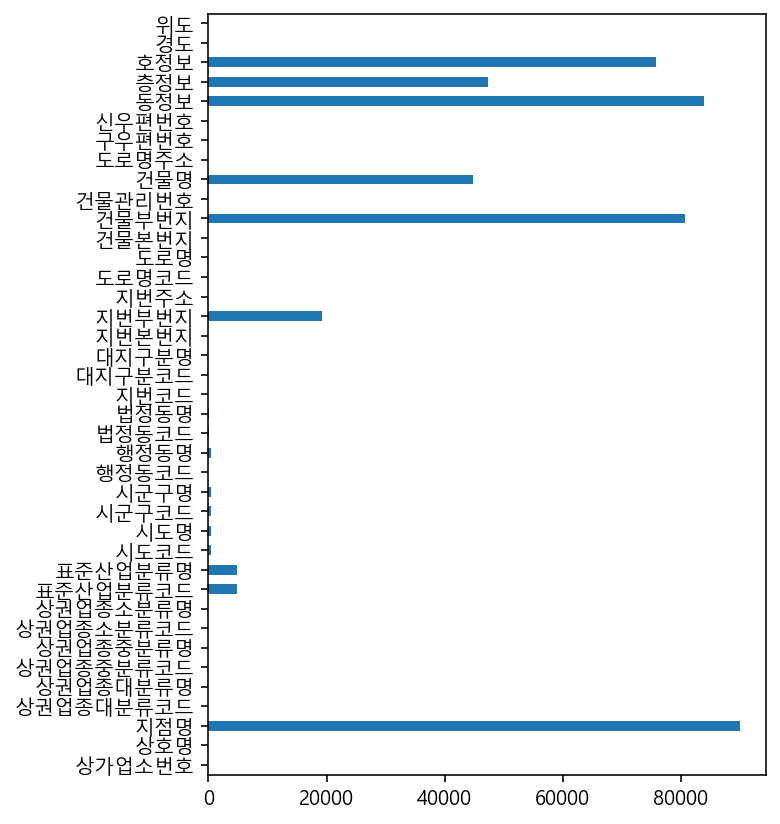

In [13]:
null_count.plot.barh(figsize = (5, 7))

In [14]:
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경

In [15]:
df_null_count.columns = ["컬럼명", "결측지수"]
df_null_count.head(7)

,컬럼명,결측지수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0


## 정렬하기

In [16]:
df_null_count_top = df_null_count.sort_values(by = "결측지수", ascending = False).head(10)
df_null_count_top

,컬럼명,결측지수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


## 특정 컬럼만 불러오기

In [17]:
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [18]:
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [19]:
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 제거하기

In [20]:
print(df.shape)
df = df.drop(drop_columns, axis = 1)
print(df.shape)

(91335, 39)
(91335, 29)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

* 기초 통계 수치

In [22]:
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [23]:
df[["위도", "경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [24]:
df.describe(include = "object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


## 요약값 보기

In [25]:
city = df["시도명"].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

<AxesSubplot:>

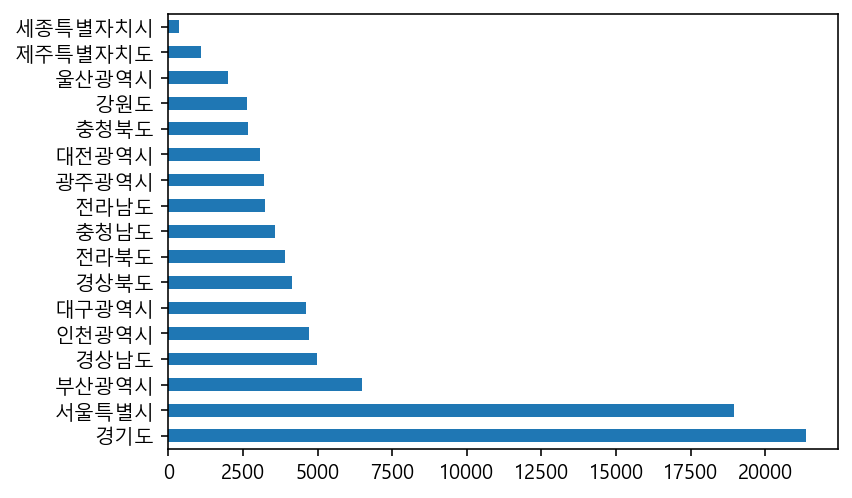

In [26]:
city.plot.barh()

In [27]:
df_daejeon_khospital = df[(df["상권업종소분류명"] == "한의원") & (df["시도명"] == "대전광역시")]
print(df_daejeon_khospital.shape)
df_daejeon_khospital.head(1)

(450, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1359,21905141,수민한의원,S,의료,S01,병원,S01B06,한의원,대전광역시,30230.0,...,대전광역시 대덕구 목상동 100,302304304045,대전광역시 대덕구 대덕대로1447번길,40,3023011100106500002002952,대전광역시 대덕구 대덕대로1447번길 40,306210.0,34300.0,127.415228,36.451784


In [28]:
c = df_daejeon_khospital["시군구명"].value_counts()
c

서구     174
중구      95
동구      78
유성구     65
대덕구     38
Name: 시군구명, dtype: int64

<AxesSubplot:>

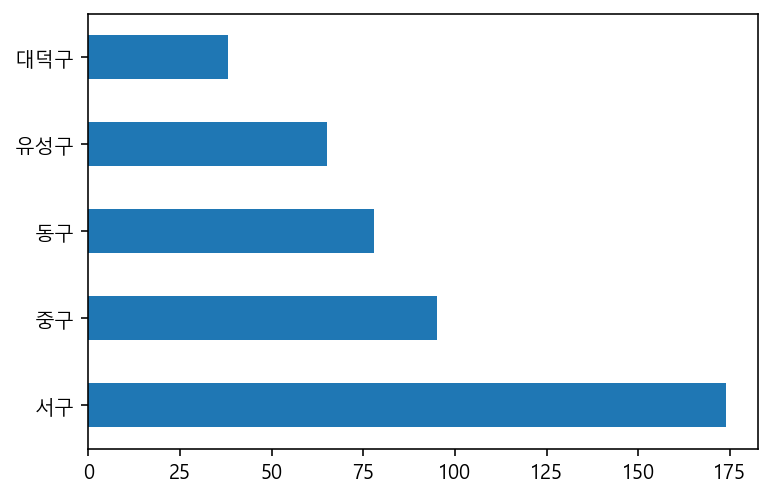

In [29]:
c.plot.barh()

In [30]:
df_deajeon_khospital = df[(df["상권업종소분류명"] =="한의원") & (df["시도명"] =="대전광역시")].copy()
df_deajeon_khospital

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1359,21905141,수민한의원,S,의료,S01,병원,S01B06,한의원,대전광역시,30230.0,...,대전광역시 대덕구 목상동 100,302304304045,대전광역시 대덕구 대덕대로1447번길,40,3023011100106500002002952,대전광역시 대덕구 대덕대로1447번길 40,306210.0,34300.0,127.415228,36.451784
1873,22835386,테미한의원,S,의료,S01,병원,S01B06,한의원,대전광역시,30140.0,...,대전광역시 중구 대흥동 240-43,301403010018,대전광역시 중구 충무로,19,3014010500102400043015182,대전광역시 중구 충무로 19,301804.0,34953.0,127.419722,36.318521
2163,25432001,동안미소한의원,S,의료,S01,병원,S01B06,한의원,대전광역시,30170.0,...,대전광역시 서구 둔산동 1072,301703166019,대전광역시 서구 둔산로,20,3017011200110720000020511,대전광역시 서구 둔산로 20,302120.0,35230.0,127.376212,36.351874
2378,25463931,민들레한의원,S,의료,S01,병원,S01B06,한의원,대전광역시,30170.0,...,대전광역시 서구 탄방동 735,301703166026,대전광역시 서구 문예로,7,3017010600107350000022724,대전광역시 서구 문예로 7,302859.0,35260.0,127.389861,36.347429
2399,25479161,건재국한의원,S,의료,S01,병원,S01B06,한의원,대전광역시,30170.0,...,대전광역시 서구 용문동 242-12,301704298087,대전광역시 서구 계룡로649번길,35,3017010500102420012024297,대전광역시 서구 계룡로649번길 35,302844.0,35307.0,127.395185,36.339038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88750,15800766,이엠한의원,S,의료,S01,병원,S01B06,한의원,대전광역시,30140.0,...,대전광역시 중구 선화동 207-7,301403165023,대전광역시 중구 선화서로,77,3014010200102070007022181,대전광역시 중구 선화서로 77,301825.0,34850.0,127.416548,36.330384
88991,15889889,태화당한의원,S,의료,S01,병원,S01B06,한의원,대전광역시,30170.0,...,대전광역시 서구 내동 220,301703166037,대전광역시 서구 신갈마로,46,3017011000102200000006408,대전광역시 서구 신갈마로 46,302761.0,35284.0,127.367515,36.337498
89061,15917315,해아림한의원,S,의료,S01,병원,S01B06,한의원,대전광역시,30170.0,...,대전광역시 서구 탄방동 704,301703166027,대전광역시 서구 문정로,70,3017010600107040000022931,대전광역시 서구 문정로 70,302859.0,35262.0,127.387017,36.346459
89094,15922389,행복한의원,S,의료,S01,병원,S01B06,한의원,대전광역시,30140.0,...,대전광역시 중구 선화동 79-14,301404295166,대전광역시 중구 대종로550번길,5,3014010200100790014002124,대전광역시 중구 대종로550번길 5,301734.0,34831.0,127.421623,36.332554


In [31]:
df_deajeon_khospital["시군구명"].value_counts()

서구     174
중구      95
동구      78
유성구     65
대덕구     38
Name: 시군구명, dtype: int64

In [32]:
df_deajeon_khospital.loc[~df_deajeon_khospital["상호명"].str.contains("한의원"),
                      "상호명"].unique()

array(['바른몸', '화접몽', '동인당한약방', '원일당건재약업사', '세종한약방', '낙원당한약방', '동양한약방',
       '수왕당한약방', '대광건재한약방', '태화당', '광화당건재한약방', '아이누리', '제원당한약방', '태원한약방',
       '은어송치과의원', '경동건재한약방', '삼보당한약방', '보원당한약방', '산초당건재한약방', '동국당한약방',
       '인동한약방', '광명한약방', '청화당한약방', '대창한약방', '활천당한약방', '중앙건재도매한약방',
       '장춘당건재한약방', '대화당한약방', '함소아', '천화당한약방', '글꽃치과의원', '박달나무엠피알',
       '백제당한약방'], dtype=object)

In [33]:
drop_row = df_deajeon_khospital[df_deajeon_khospital["상호명"].str.contains("바른몸|치과|피부과|업사")].index
drop_row = drop_row.tolist()
drop_row

[2494, 9418, 21122, 47714, 62645]

In [34]:
print(df_deajeon_khospital.shape)
df_deajeon_khospital = df_deajeon_khospital.drop(drop_row, axis = 0)
print(df_deajeon_khospital.shape)

(450, 29)
(445, 29)


<AxesSubplot:>

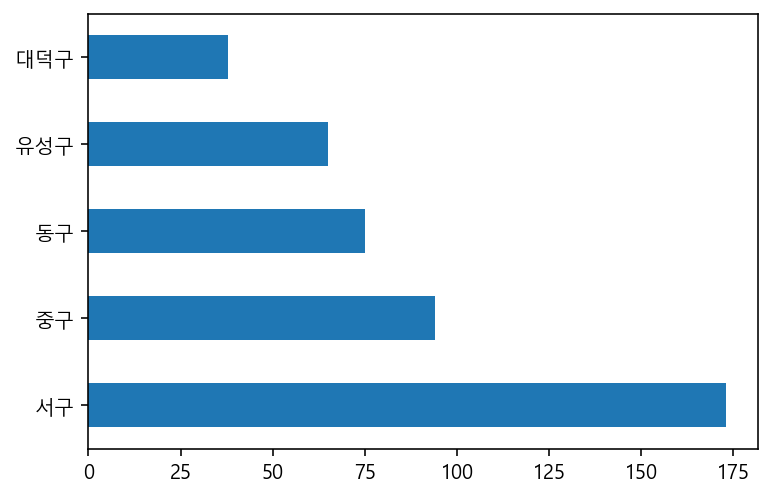

In [35]:
df_deajeon_khospital["시군구명"].value_counts().plot.barh()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

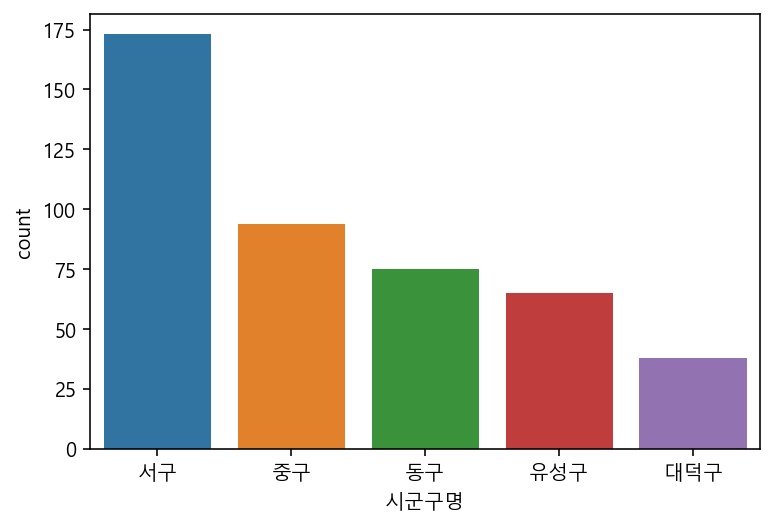

In [36]:
sns.countplot(data = df_deajeon_khospital, x = "시군구명",
             order = df_deajeon_khospital["시군구명"].value_counts().index)

<AxesSubplot:xlabel='위도', ylabel='경도'>

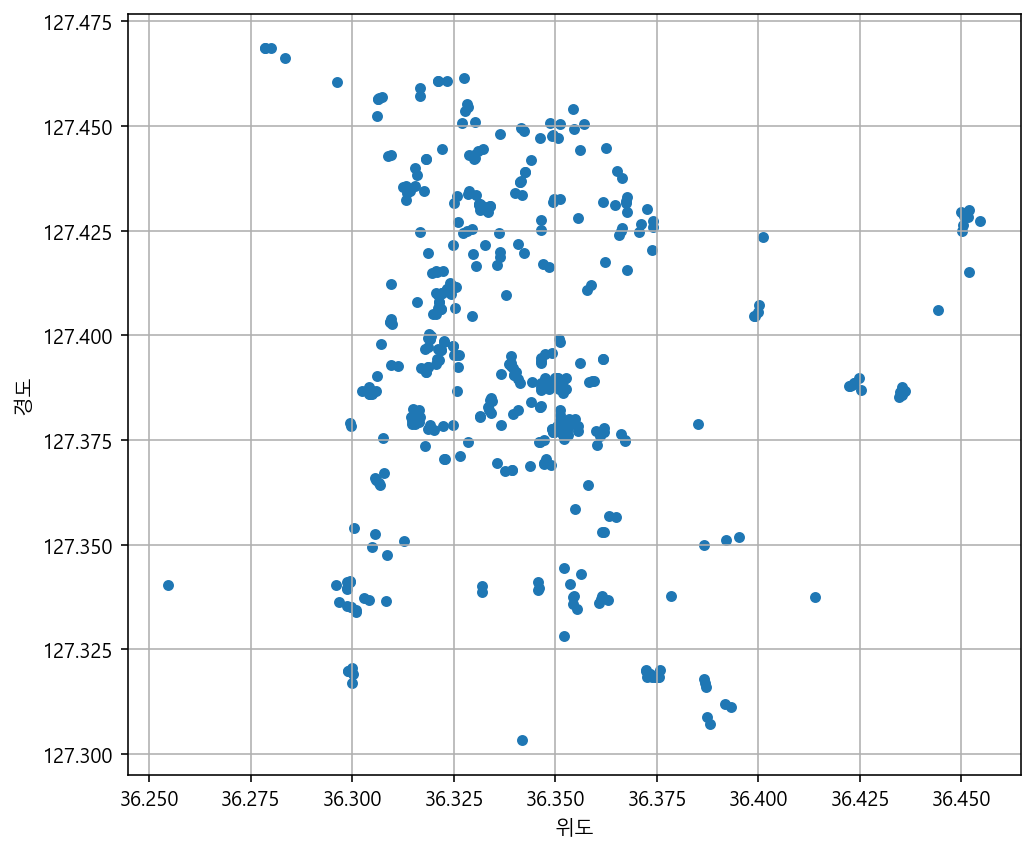

In [37]:
df_deajeon_khospital[["경도", "위도", "시군구명"]].plot.scatter(x = "위도", y = "경도", figsize = (8,7), grid = True)

<AxesSubplot:xlabel='위도', ylabel='경도'>

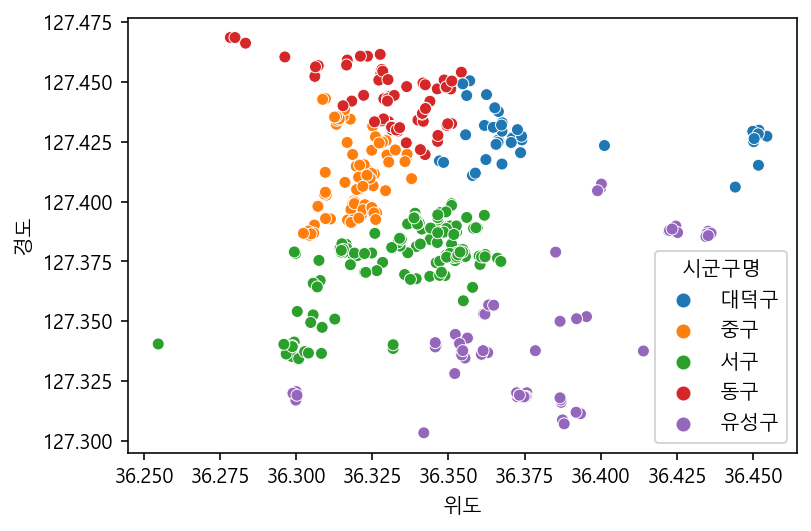

In [38]:
sns.scatterplot(data = df_deajeon_khospital, x = "위도", y = "경도", hue = "시군구명")

In [39]:
import folium

In [40]:
map = folium.Map(location = [df_deajeon_khospital["위도"].mean(), df_deajeon_khospital["경도"].mean()],
                zoom_start = 12)

for n in df_deajeon_khospital.index:
    name = df_deajeon_khospital.loc[n, "상호명"]
    address = df_deajeon_khospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = df_deajeon_khospital.loc[n, "위도"], df_deajeon_khospital.loc[n, "경도"]
    folium.Marker(
        location= location,
        popup = popup,).add_to(map)
map